# **Project - Convolutional Neural Networks: Street View Housing Number Digit Recognition**


## **Mount the drive**
Let us start by mounting the drive and importing the necessary libraries.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical

Let us check for the version of TensorFlow.

In [ ]:
print(tf.__version__)

2.8.0


## **Load the dataset**

In [ ]:
import h5py

# Open the file as read only
# User can make changes in the path as required
h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

Let's check the number of images in the training and testing data.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

**Observations**
- There are 42,000 images in the training data and 18,000 images in the testing data.

## **Visualizing images**
- Use X_train to visualize the first 10 images
- Use Y_train to print the first 10 labels

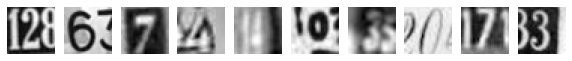

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray") # write the function to visualize images
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [ ]:
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# Reshaping the dataset to flatten them. Remember that we always have to give a 4D array as input to CNNs

X_train = X_train.reshape(X_train.shape[0], 32,32,1)
X_test = X_test.reshape(X_test.shape[0], 32,32,1)

In [ ]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# New shape

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


In [ ]:
#Write the function and appropriate variable name to one-hot encode the output

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#test labels
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

- Notice that each entry of y_test is a one-hot encoded vector instead of a single label.

## **Model Building**

Now, we have done data preprocessing, let's build a CNN model.

In [ ]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def cnn_model_1():
    model = Sequential()
    #Add layers as per the architecture mentioned above in the same sequence -
    #First Convolutional layer with 16 filters and kernel size of 3x3 Use the same' padding and provide an apt input shape
    model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', input_shape=(32,32,1)))
    #LeakyRelu layer with the slope equal to 0.1
    model.add(LeakyReLU(0.1))
    #Second Convolutional layer with 32 filters and kernel size of 3x3 with 'same' padding
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same'))
    #AnotherLeakyRelu with the slope equal to 0.1
    model.add(LeakyReLU(0.1))
    # A max-pooling layer with a pool size of 2x2
    model.add(MaxPool2D(pool_size=(2,2)))
    # Flatten the output from the previous layer
    model.add(Flatten())
    # Add a dense layer with 32 nodes
    model.add(Dense(32))
    # Add a LeakyRelu layer with slope equal to 0.1
    model.add(LeakyReLU(0.1))
    # Add the final output layer with nodes equal to the number of classes and softmax activation
    model.add(Dense(10, activation='softmax'))
    #declare adam optimizer with learning rate of 0.001
    adam = optimizers.Adam(learning_rate = 0.001)

    #compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [ ]:
#Build the model
model_1 = cnn_model_1()

In [ ]:
#Print the model summary
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 32, 32, 16)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                      

In [ ]:
# Fit the model
history_model_1 = model_1.fit(X_train, y_train, validation_split=0.2, epochs=20, verbose=1, batch_size=32)

Epoch 1/20
1050/1050 [==============================] - 21s 10ms/step - loss: 1.0604 - accuracy: 0.6586 - val_loss: 0.6355 - val_accuracy: 0.8176
Epoch 2/20
1050/1050 [==============================] - 10s 10ms/step - loss: 0.5418 - accuracy: 0.8446 - val_loss: 0.5107 - val_accuracy: 0.8577
Epoch 3/20
1050/1050 [==============================] - 10s 10ms/step - loss: 0.4582 - accuracy: 0.8684 - val_loss: 0.5107 - val_accuracy: 0.8545
Epoch 4/20
1050/1050 [==============================] - 10s 9ms/step - loss: 0.4016 - accuracy: 0.8829 - val_loss: 0.4697 - val_accuracy: 0.8705
Epoch 5/20
1050/1050 [==============================] - 10s 10ms/step - loss: 0.3555 - accuracy: 0.8944 - val_loss: 0.4823 - val_accuracy: 0.8654
Epoch 6/20
1050/1050 [==============================] - 10s 10ms/step - loss: 0.3215 - accuracy: 0.9054 - val_loss: 0.4720 - val_accuracy: 0.8668
Epoch 7/20
1050/1050 [==============================] - 10s 9ms/step - loss: 0.2912 - accuracy: 0.9124 - val_loss: 0.4531 - v

### **Plotting the validation and training accuracies**

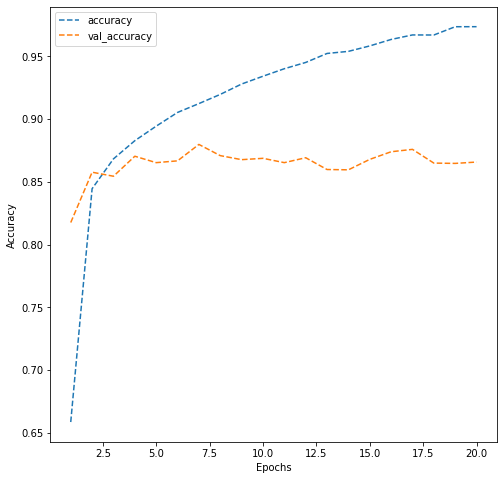

In [ ]:
# plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:__________**
- The above model shows over fitting as the val_accuracy seems to stay the same around .85 after ~5 epochs, while the accuracy increases over time.
- More parameters can be used to avoid overfitting and imporve the model structure.  

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

 Build and train the second CNN model

In [ ]:
#Define the function
def cnn_model_2():
    model = Sequential()
    #Add layers as per the architecture mentioned above in the same sequence
    #First Convolutional layer with 16 filters and kernel size of 3x3 Use the same' padding and provide an apt input shape
    model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', input_shape=(32,32,1)))
    #LeakyRelu layer with the slope equal to 0.1
    model.add(LeakyReLU(0.1))
    #Second Convolutional layer with 32 filters and kernel size of 3x3 with 'same' padding
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same'))
    # AnotherLeakyRelu with the slope equal to 0.1
    model.add(LeakyReLU(0.1))
    # A max-pooling layer with a pool size of 2x2
    model.add(MaxPool2D(pool_size=(2,2)))
    # Third Convolutional layer
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same'))
    # Add a LeakyRelu layer with slope equal to 0.1
    model.add(LeakyReLU(0.1))
    # Fourth Convolutional layer
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same'))
    # AnotherLeakyRelu with the slope equal to 0.1
    model.add(LeakyReLU(0.1))
    # A max-pooling layer with a pool size of 2x2
    model.add(MaxPool2D(pool_size=(2,2)))
    #Batch Normalization Layer
    model.add(BatchNormalization())
    # Flatten the output from the previous layer
    model.add(Flatten())
    # Add a dense layer with 32 nodes
    model.add(Dense(32))
    # Add a LeakyRelu layer with slope equal to 0.1
    model.add(LeakyReLU(0.1))
    #Drop out Layer
    model.add(Dropout(0.5))
    # Add the final output layer with nodes equal to the number of classes and softmax activation
    model.add(Dense(10, activation='softmax'))

    #declare adam optimizer with learning rate of 0.001
    adam = optimizers.Adam(learning_rate = 0.001)

    #compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [ ]:
# Build the model
model_2 = cnn_model_2()

In [ ]:
#Print the summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        9248      
                                                        

In [ ]:
# Fit the model
history_model_2 = model_2.fit(X_train, y_train, validation_split=0.2, epochs=30, verbose=1, batch_size=128)

Epoch 1/30
263/263 [==============================] - 7s 23ms/step - loss: 1.3863 - accuracy: 0.5145 - val_loss: 1.7851 - val_accuracy: 0.7046
Epoch 2/30
263/263 [==============================] - 6s 22ms/step - loss: 0.6835 - accuracy: 0.7891 - val_loss: 0.6460 - val_accuracy: 0.8519
Epoch 3/30
263/263 [==============================] - 6s 22ms/step - loss: 0.5729 - accuracy: 0.8241 - val_loss: 0.4421 - val_accuracy: 0.8724
Epoch 4/30
263/263 [==============================] - 6s 22ms/step - loss: 0.5185 - accuracy: 0.8407 - val_loss: 0.4062 - val_accuracy: 0.8876
Epoch 5/30
263/263 [==============================] - 6s 22ms/step - loss: 0.4824 - accuracy: 0.8538 - val_loss: 0.4166 - val_accuracy: 0.8808
Epoch 6/30
263/263 [==============================] - 6s 22ms/step - loss: 0.4415 - accuracy: 0.8626 - val_loss: 0.4089 - val_accuracy: 0.8861
Epoch 7/30
263/263 [==============================] - 6s 21ms/step - loss: 0.4163 - accuracy: 0.8728 - val_loss: 0.3795 - val_accuracy: 0.8954

### **Plotting the validation and training accuracies**

#### **Question 6: Write your observations on the below plot (2 Marks)**

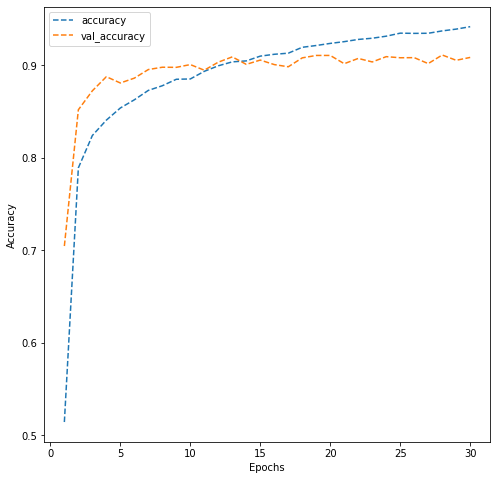

In [ ]:
# plotting the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:________**

- The model accuracy has improved from the first model presented.
- Overfitting is still a problem as the val_accuracy remains relitvely consistent as the accuracy increases over time.

## **Predictions on the test data**

- Make predictions on the test set using the second model
- Print the obtained results using the classification report and the confusion matrix
- Final observations from the obtained results

In [ ]:
#Make prediction on the test data using model_2
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)

**Note:** Earlier, we noticed that each entry of the test data is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
#Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1814
           1       0.87      0.93      0.90      1828
           2       0.94      0.90      0.92      1803
           3       0.89      0.88      0.88      1719
           4       0.90      0.94      0.92      1812
           5       0.91      0.90      0.90      1768
           6       0.89      0.91      0.90      1832
           7       0.94      0.92      0.93      1808
           8       0.91      0.88      0.89      1812
           9       0.92      0.88      0.90      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



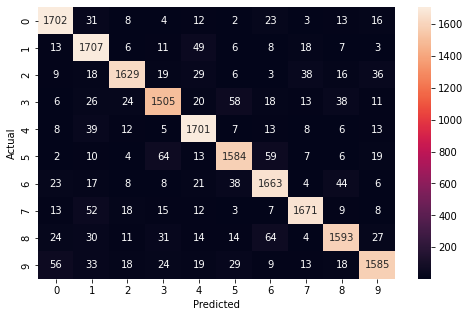

In [ ]:
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### **Observations:_________**

- The model performs quite well with an accurcay of .91
- The model has the least precision with the number 1, with a score of .87
- 7 and 2 have the highest recall suggesting the model is able to distinguish these numbers the most from others (.94)